In [1]:
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
ds = tfds.load('mnist', split='train', shuffle_files=False)
assert isinstance(ds, tf.data.Dataset)
print(ds)

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


In [3]:
train_images = []
train_labels = []
for example in ds:
  train_images.append(example["image"])
  train_labels.append(example["label"])

In [4]:
X = numpy.array(train_images)
y = numpy.array(train_labels)
X = X.reshape(X.shape[0],784)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [6]:
def divide_data(X, y , class_y):
    dataset = [X[i] for i in range(len(X)) if y[i] == class_y ]
    return numpy.array(dataset)

def lambda_likelihood(X):
    lambda_j = numpy.zeros((784,))
    for i in range(784):
        x_j = 0
        for k in range(len(X)):
            x_j += X[k][i]
        lambda_j[i] = (len(X))/(x_j+1)
    return lambda_j 


def log_density_func(x, lambda_j):
    temp = 0
    for i in range(784):
        temp += numpy.log(lambda_j[i])
    return temp - numpy.dot(x, lambda_j)

'''
    Classification Bayesian
    1. Calculate posterior probabilities
    2. Get argmax over the obtained probabilities
'''
def classification_bayesian(test_image, lambda_all, prior_all):
    output_label = numpy.zeros((10,))
    for i in range(10):
        output_label[i] = prior_all[i] * log_density_func(test_image, lambda_all[i])
    return numpy.argmax(output_label, axis=0)


In [7]:
class_all = []

class_all.append(divide_data(X, y, 0)) 
class_all.append(divide_data(X, y, 1))
class_all.append(divide_data(X, y, 2))
class_all.append(divide_data(X, y, 3))
class_all.append(divide_data(X, y, 4))
class_all.append(divide_data(X, y, 5))
class_all.append(divide_data(X, y, 6))
class_all.append(divide_data(X, y, 7))
class_all.append(divide_data(X, y, 8))
class_all.append(divide_data(X, y, 9))

prior_all = numpy.zeros((10,1))

prior_all[0] = len(class_all[0])/len(X)
prior_all[1] = len(class_all[1])/len(X)
prior_all[2] = len(class_all[2])/len(X)
prior_all[3] = len(class_all[3])/len(X)
prior_all[4] = len(class_all[4])/len(X)
prior_all[5] = len(class_all[5])/len(X)
prior_all[6] = len(class_all[6])/len(X)
prior_all[7] = len(class_all[7])/len(X)
prior_all[8] = len(class_all[8])/len(X)
prior_all[9] = len(class_all[9])/len(X)


In [8]:
lambda_all = numpy.zeros((10,784))

for i in range(10):
    print("Modeling Densities for class ", i)
    # Likelihood paramters
    lambda_all[i] = lambda_likelihood(class_all[i])


Modeling Densities for class  0
Modeling Densities for class  1
Modeling Densities for class  2
Modeling Densities for class  3
Modeling Densities for class  4
Modeling Densities for class  5
Modeling Densities for class  6
Modeling Densities for class  7
Modeling Densities for class  8
Modeling Densities for class  9


In [9]:
ds_test = tfds.load('mnist', split='test', shuffle_files=False)
assert isinstance(ds_test, tf.data.Dataset)
print(ds_test)

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


In [10]:
test_images = []
test_labels = []
for example in ds_test:
  test_images.append(example["image"])
  test_labels.append(example["label"])

In [11]:
X_test = numpy.array(test_images)
y_test = numpy.array(test_labels)
X_test.shape, y_test.shape

((10000, 28, 28, 1), (10000,))

In [12]:
X_test = X_test.reshape(X_test.shape[0],-1)
X_test.shape

(10000, 784)

In [13]:
from tqdm import tqdm

'''
    Accuracy on test data
'''
predicted_labels = numpy.zeros((X_test.shape[0],1))
for i in tqdm(range(len(X_test))):
    if i % 100 == 0:
        print("Tested on ", i)
    predicted_labels[i] = classification_bayesian(X_test[i], lambda_all, prior_all)


  0%|          | 26/10000 [00:00<02:05, 79.27it/s]

Tested on  0


  1%|          | 110/10000 [00:01<01:57, 84.16it/s]

Tested on  100


  2%|▏         | 226/10000 [00:02<01:47, 90.84it/s]

Tested on  200


  3%|▎         | 324/10000 [00:03<01:47, 90.32it/s]

Tested on  300


  4%|▍         | 408/10000 [00:04<02:02, 78.36it/s]

Tested on  400


  5%|▌         | 523/10000 [00:06<01:46, 89.24it/s]

Tested on  500


  6%|▌         | 617/10000 [00:07<01:52, 83.33it/s]

Tested on  600


  7%|▋         | 722/10000 [00:08<01:48, 85.86it/s]

Tested on  700


  8%|▊         | 827/10000 [00:09<01:45, 86.83it/s]

Tested on  800


  9%|▉         | 922/10000 [00:10<01:42, 88.85it/s]

Tested on  900


 10%|█         | 1015/10000 [00:11<01:39, 89.92it/s]

Tested on  1000


 11%|█▏        | 1129/10000 [00:13<01:42, 86.83it/s]

Tested on  1100


 12%|█▏        | 1222/10000 [00:14<01:45, 83.28it/s]

Tested on  1200


 13%|█▎        | 1324/10000 [00:15<01:38, 88.23it/s]

Tested on  1300


 14%|█▍        | 1429/10000 [00:16<01:35, 89.28it/s]

Tested on  1400


 15%|█▌        | 1513/10000 [00:17<01:44, 81.52it/s]

Tested on  1500


 16%|█▋        | 1625/10000 [00:18<01:36, 86.89it/s]

Tested on  1600


 17%|█▋        | 1710/10000 [00:19<01:33, 89.08it/s]

Tested on  1700


 18%|█▊        | 1821/10000 [00:21<01:32, 88.82it/s]

Tested on  1800


 19%|█▉        | 1913/10000 [00:22<01:38, 81.83it/s]

Tested on  1900


 20%|██        | 2023/10000 [00:23<01:34, 84.82it/s]

Tested on  2000


 21%|██        | 2117/10000 [00:24<01:30, 87.01it/s]

Tested on  2100


 22%|██▏       | 2216/10000 [00:26<01:35, 81.09it/s]

Tested on  2200


 23%|██▎       | 2314/10000 [00:27<01:40, 76.62it/s]

Tested on  2300


 24%|██▍       | 2411/10000 [00:28<01:28, 86.18it/s]

Tested on  2400


 25%|██▌       | 2519/10000 [00:29<01:36, 77.79it/s]

Tested on  2500


 26%|██▋       | 2627/10000 [00:31<01:25, 86.65it/s]

Tested on  2600


 27%|██▋       | 2724/10000 [00:32<01:25, 85.10it/s]

Tested on  2700


 28%|██▊       | 2827/10000 [00:33<01:32, 77.50it/s]

Tested on  2800


 29%|██▉       | 2925/10000 [00:34<01:19, 88.63it/s]

Tested on  2900


 30%|███       | 3010/10000 [00:35<01:30, 77.03it/s]

Tested on  3000


 31%|███       | 3119/10000 [00:37<01:23, 82.06it/s]

Tested on  3100


 32%|███▏      | 3221/10000 [00:38<01:17, 87.86it/s]

Tested on  3200


 33%|███▎      | 3314/10000 [00:39<01:17, 86.46it/s]

Tested on  3300


 34%|███▍      | 3427/10000 [00:40<01:14, 88.18it/s]

Tested on  3400


 35%|███▌      | 3522/10000 [00:41<01:13, 88.73it/s]

Tested on  3500


 36%|███▋      | 3625/10000 [00:42<01:12, 87.96it/s]

Tested on  3600


 37%|███▋      | 3728/10000 [00:44<01:10, 88.43it/s]

Tested on  3700


 38%|███▊      | 3821/10000 [00:45<01:15, 81.47it/s]

Tested on  3800


 39%|███▉      | 3924/10000 [00:46<01:09, 87.18it/s]

Tested on  3900


 40%|████      | 4017/10000 [00:47<01:14, 80.24it/s]

Tested on  4000


 41%|████      | 4124/10000 [00:48<01:07, 87.63it/s]

Tested on  4100


 42%|████▏     | 4211/10000 [00:49<01:15, 76.26it/s]

Tested on  4200


 43%|████▎     | 4323/10000 [00:51<01:03, 89.22it/s]

Tested on  4300


 44%|████▍     | 4427/10000 [00:52<01:02, 88.74it/s]

Tested on  4400


 45%|████▌     | 4526/10000 [00:53<01:09, 78.45it/s]

Tested on  4500


 46%|████▌     | 4619/10000 [00:54<01:05, 82.66it/s]

Tested on  4600


 47%|████▋     | 4722/10000 [00:55<00:59, 88.07it/s]

Tested on  4700


 48%|████▊     | 4815/10000 [00:56<00:59, 86.48it/s]

Tested on  4800


 49%|████▉     | 4919/10000 [00:58<01:00, 83.75it/s]

Tested on  4900


 50%|█████     | 5023/10000 [00:59<00:56, 88.66it/s]

Tested on  5000


 51%|█████     | 5117/10000 [01:00<00:55, 87.66it/s]

Tested on  5100


 52%|█████▏    | 5222/10000 [01:01<00:55, 86.52it/s]

Tested on  5200


 53%|█████▎    | 5311/10000 [01:02<01:01, 76.83it/s]

Tested on  5300


 54%|█████▍    | 5423/10000 [01:04<00:54, 84.31it/s]

Tested on  5400


 55%|█████▌    | 5526/10000 [01:05<00:56, 79.34it/s]

Tested on  5500


 56%|█████▌    | 5624/10000 [01:06<00:49, 88.11it/s]

Tested on  5600


 57%|█████▋    | 5723/10000 [01:07<00:54, 77.90it/s]

Tested on  5700


 58%|█████▊    | 5824/10000 [01:09<00:48, 86.12it/s]

Tested on  5800


 59%|█████▉    | 5935/10000 [01:10<00:45, 88.84it/s]

Tested on  5900


 60%|██████    | 6026/10000 [01:11<00:46, 84.96it/s]

Tested on  6000


 61%|██████▏   | 6126/10000 [01:12<00:44, 87.94it/s]

Tested on  6100


 62%|██████▏   | 6219/10000 [01:13<00:43, 86.97it/s]

Tested on  6200


 63%|██████▎   | 6319/10000 [01:14<00:42, 85.76it/s]

Tested on  6300


 64%|██████▍   | 6420/10000 [01:16<00:41, 85.62it/s]

Tested on  6400


 65%|██████▌   | 6521/10000 [01:17<00:42, 82.13it/s]

Tested on  6500


 66%|██████▌   | 6622/10000 [01:18<00:38, 87.30it/s]

Tested on  6600


 67%|██████▋   | 6723/10000 [01:19<00:39, 83.41it/s]

Tested on  6700


 68%|██████▊   | 6814/10000 [01:20<00:37, 85.90it/s]

Tested on  6800


 69%|██████▉   | 6925/10000 [01:22<00:40, 75.14it/s]

Tested on  6900


 70%|███████   | 7021/10000 [01:23<00:38, 76.72it/s]

Tested on  7000


 71%|███████   | 7124/10000 [01:24<00:33, 86.29it/s]

Tested on  7100


 72%|███████▏  | 7217/10000 [01:25<00:32, 85.65it/s]

Tested on  7200


 73%|███████▎  | 7321/10000 [01:26<00:29, 89.56it/s]

Tested on  7300


 74%|███████▍  | 7422/10000 [01:28<00:29, 87.37it/s]

Tested on  7400


 75%|███████▌  | 7515/10000 [01:29<00:29, 84.86it/s]

Tested on  7500


 76%|███████▋  | 7626/10000 [01:30<00:27, 85.39it/s]

Tested on  7600


 77%|███████▋  | 7727/10000 [01:31<00:27, 84.18it/s]

Tested on  7700


 78%|███████▊  | 7810/10000 [01:32<00:27, 79.51it/s]

Tested on  7800


 79%|███████▉  | 7922/10000 [01:33<00:23, 87.70it/s]

Tested on  7900


 80%|████████  | 8013/10000 [01:35<00:25, 78.57it/s]

Tested on  8000


 81%|████████  | 8114/10000 [01:36<00:22, 83.88it/s]

Tested on  8100


 82%|████████▏ | 8225/10000 [01:37<00:19, 88.77it/s]

Tested on  8200


 83%|████████▎ | 8326/10000 [01:38<00:19, 87.22it/s]

Tested on  8300


 84%|████████▍ | 8411/10000 [01:39<00:18, 87.74it/s]

Tested on  8400


 85%|████████▌ | 8510/10000 [01:40<00:17, 84.23it/s]

Tested on  8500


 86%|████████▋ | 8628/10000 [01:42<00:16, 84.44it/s]

Tested on  8600


 87%|████████▋ | 8710/10000 [01:43<00:16, 80.45it/s]

Tested on  8700


 88%|████████▊ | 8828/10000 [01:44<00:13, 87.23it/s]

Tested on  8800


 89%|████████▉ | 8921/10000 [01:45<00:12, 88.53it/s]

Tested on  8900


 90%|█████████ | 9017/10000 [01:46<00:12, 80.34it/s]

Tested on  9000


 91%|█████████▏| 9125/10000 [01:48<00:11, 78.55it/s]

Tested on  9100


 92%|█████████▏| 9221/10000 [01:49<00:09, 86.14it/s]

Tested on  9200


 93%|█████████▎| 9320/10000 [01:50<00:08, 84.29it/s]

Tested on  9300


 94%|█████████▍| 9421/10000 [01:51<00:06, 85.30it/s]

Tested on  9400


 95%|█████████▌| 9524/10000 [01:53<00:05, 87.33it/s]

Tested on  9500


 96%|█████████▌| 9618/10000 [01:54<00:04, 79.95it/s]

Tested on  9600


 97%|█████████▋| 9716/10000 [01:55<00:03, 74.21it/s]

Tested on  9700


 98%|█████████▊| 9818/10000 [01:56<00:02, 84.13it/s]

Tested on  9800


 99%|█████████▉| 9914/10000 [01:58<00:01, 76.45it/s]

Tested on  9900


100%|██████████| 10000/10000 [01:59<00:00, 84.00it/s]


In [14]:
!pip install scikit-plot

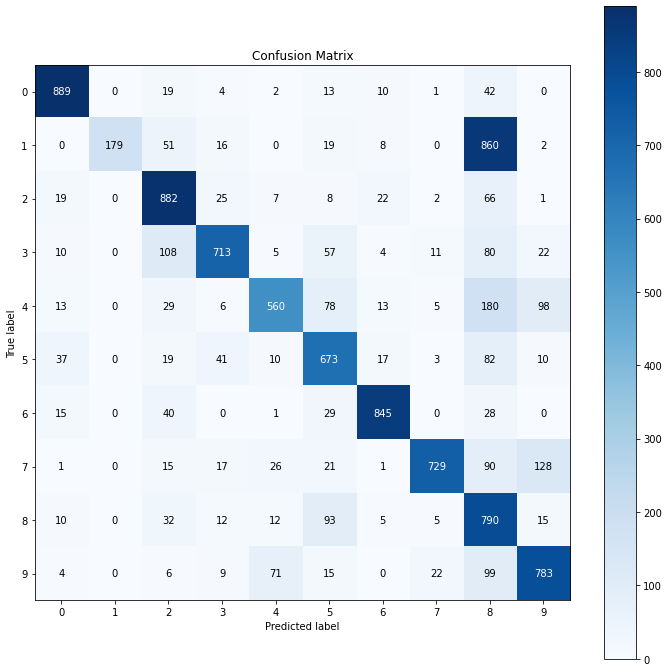

In [15]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    predicted_labels,
    figsize=(12,12))

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_labels, target_names=['0','1','2','3','4','5','6', '7', '8', '9']))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       980
           1       1.00      0.16      0.27      1135
           2       0.73      0.85      0.79      1032
           3       0.85      0.71      0.77      1010
           4       0.81      0.57      0.67       982
           5       0.67      0.75      0.71       892
           6       0.91      0.88      0.90       958
           7       0.94      0.71      0.81      1028
           8       0.34      0.81      0.48       974
           9       0.74      0.78      0.76      1009

    accuracy                           0.70     10000
   macro avg       0.79      0.71      0.71     10000
weighted avg       0.79      0.70      0.70     10000



In [17]:
from sklearn.metrics import accuracy_score

print("Accuracy of the classification ", accuracy_score(y_test, predicted_labels))

Accuracy of the classification  0.7043


In [18]:
numpy.save('results_mnist_exponential', predicted_labels)